# [Exp-04]StockPricePrediction

## 주요 라이브러리 버전 확인

In [1]:
import pandas
import sklearn
import statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

# print(pandas.__version__)
# print(sklearn.__version__)
# print(statsmodels.__version__)

### STEP 1 : 시계열 데이터 준비

* 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
* 날짜별
  - 시작가(Open)
  - 최고가(High)
  - 최저가(Low)
  - 종가(Close),
  - 수정종가(Adj Close)
  - 거래량(Volume)
* 종가(Close)만 사용하겠습니다.

In [2]:
data_path = 'data/005930.KS.csv'
data1_path = 'data/ADBE.csv'
data2_path = 'data/ATVI.csv'
data3_path = 'data/EA.csv'
data4_path = 'data/NVDA.csv'

ts_df = pd.read_csv(data_path, index_col='Date', parse_dates=True)
data1_df = pd.read_csv(data1_path, index_col='Date', parse_dates=True)
data2_df = pd.read_csv(data2_path, index_col='Date', parse_dates=True)
data3_df = pd.read_csv(data3_path, index_col='Date', parse_dates=True)
data4_df = pd.read_csv(data4_path, index_col='Date', parse_dates=True)

ts = ts_df['Close']
data1 = data1_df['Close']
data2 = data2_df['Close']
data3 = data3_df['Close']
data4 = data4_df['Close']

# print(ts.head())
# print(data1.head())
# print(data2.head())
# print(data3.head())
# print(data4.head())

### STEP 2 : 각종 전처리 수행

* 결측치 처리
* 로그 변환

In [3]:
# 결측치 처리
ts = ts.interpolate(method='time')
data1 = data1.interpolate(method='time')
data2 = data2.interpolate(method='time')
data3 = data3.interpolate(method='time')
data4 = data4.interpolate(method='time')

print(ts[ts.isna()])
print(data1[data1.isna()])
print(data2[data2.isna()])
print(data3[data3.isna()])
print(data4[data4.isna()])

Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)


In [4]:
# 로그 변환
ts_log = np.log(ts)
data1_log = np.log(data1)
data2_log = np.log(data2)
data3_log = np.log(data3)
data4_log = np.log(data4)

# print(ts_log.head())
# print(data1_log.head())
# print(data2_log.head())
# print(data3_log.head())
# print(data4_log.head())

### STEP 3 : 시계열 안정성 분석

#### 함수 선언

In [5]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [6]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

#### 분석

* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)

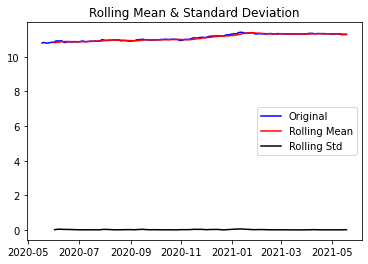

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


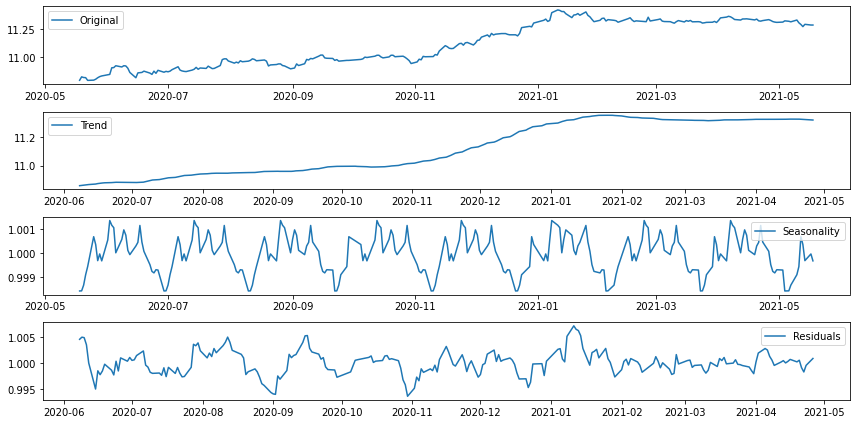

In [7]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend_ts_log = decomposition.trend
seasonal_ts_log = decomposition.seasonal
residual_ts_log = decomposition.resid

plt.rcParams["figure.figsize"] = (12,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_ts_log, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_ts_log,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_ts_log, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


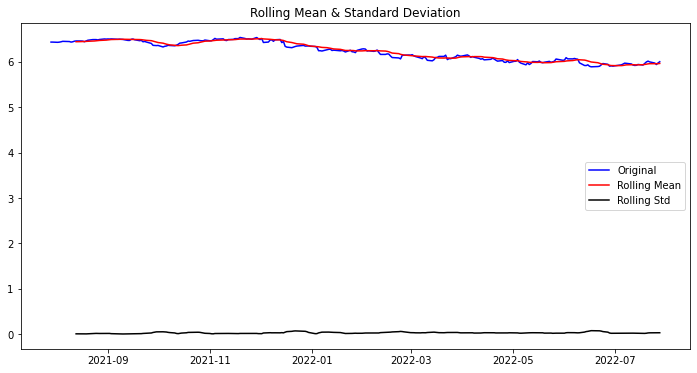

Results of Dickey-Fuller Test:
Test Statistic                  -0.883661
p-value                          0.793305
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


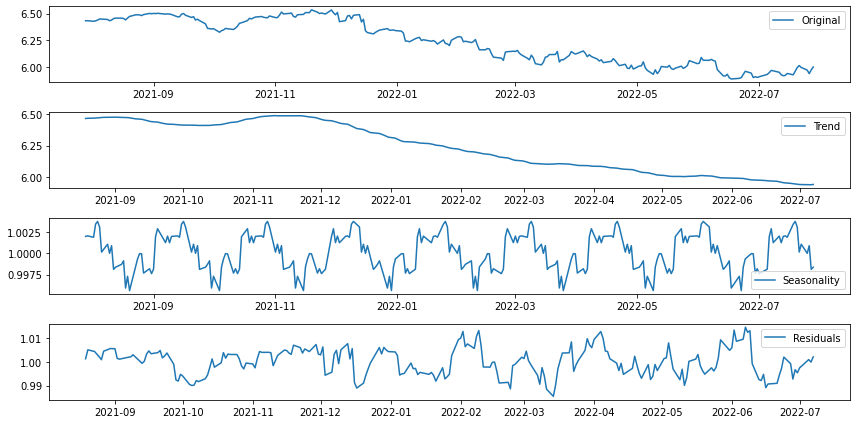

In [8]:
# 정성적 그래프 분석
plot_rolling_statistics(data1_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(data1_log)

#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(data1_log, model='multiplicative', period = 30) 

trend_data1_log = decomposition.trend
seasonal_data1_log = decomposition.seasonal
residual_data1_log = decomposition.resid

plt.rcParams["figure.figsize"] = (12,6)
plt.subplot(411)
plt.plot(data1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_data1_log, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_data1_log,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_data1_log, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


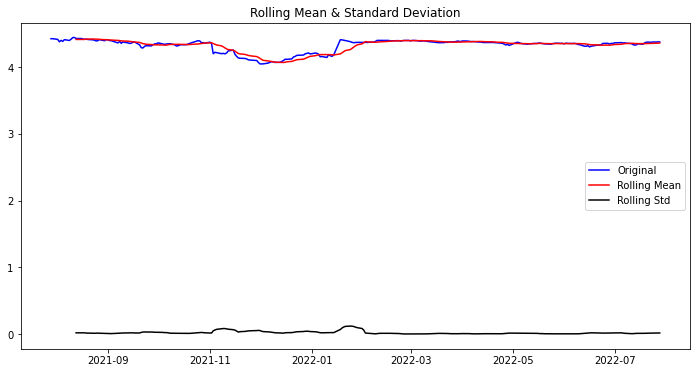

Results of Dickey-Fuller Test:
Test Statistic                  -1.916746
p-value                          0.324225
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


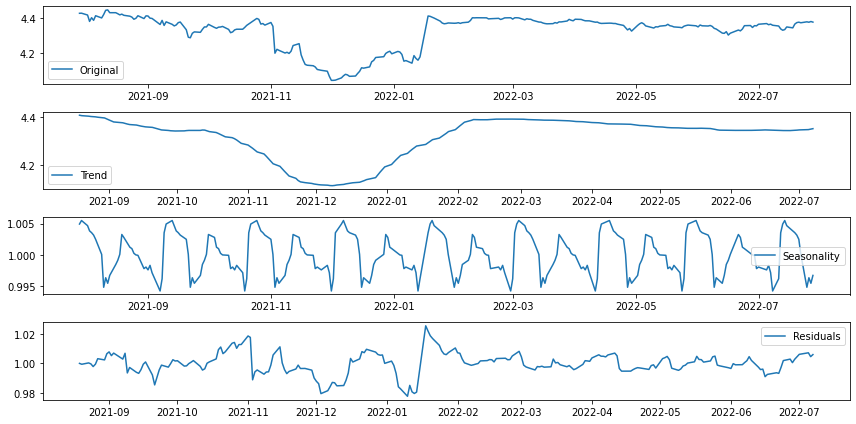

In [9]:
# 정성적 그래프 분석
plot_rolling_statistics(data2_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(data2_log)

#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(data2_log, model='multiplicative', period = 30) 

trend_data2_log = decomposition.trend
seasonal_data2_log = decomposition.seasonal
residual_data2_log = decomposition.resid

plt.rcParams["figure.figsize"] = (12,6)
plt.subplot(411)
plt.plot(data2_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_data2_log, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_data2_log,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_data2_log, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


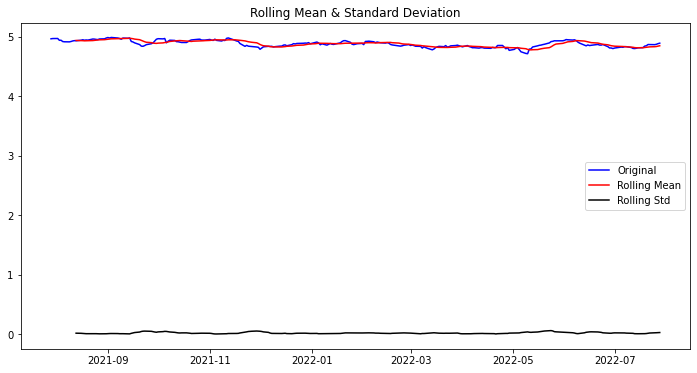

Results of Dickey-Fuller Test:
Test Statistic                  -3.022871
p-value                          0.032813
#Lags Used                       1.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


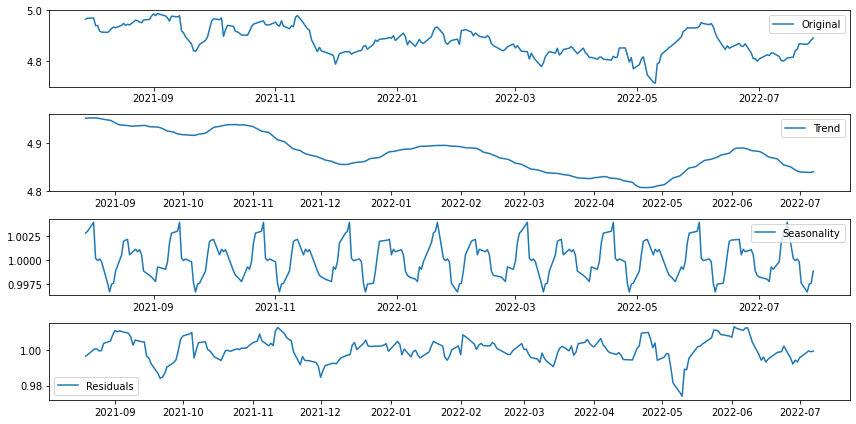

In [10]:
# 정성적 그래프 분석
plot_rolling_statistics(data3_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(data3_log)

#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(data3_log, model='multiplicative', period = 30) 

trend_data3_log = decomposition.trend
seasonal_data3_log = decomposition.seasonal
residual_data3_log = decomposition.resid

plt.rcParams["figure.figsize"] = (12,6)
plt.subplot(411)
plt.plot(data3_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_data3_log, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_data3_log,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_data3_log, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

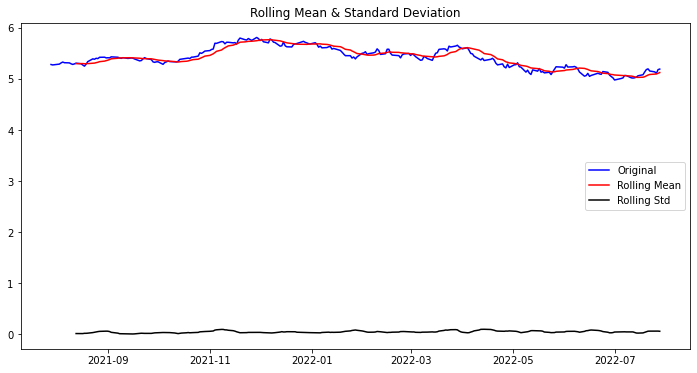

Results of Dickey-Fuller Test:
Test Statistic                  -1.291945
p-value                          0.632850
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


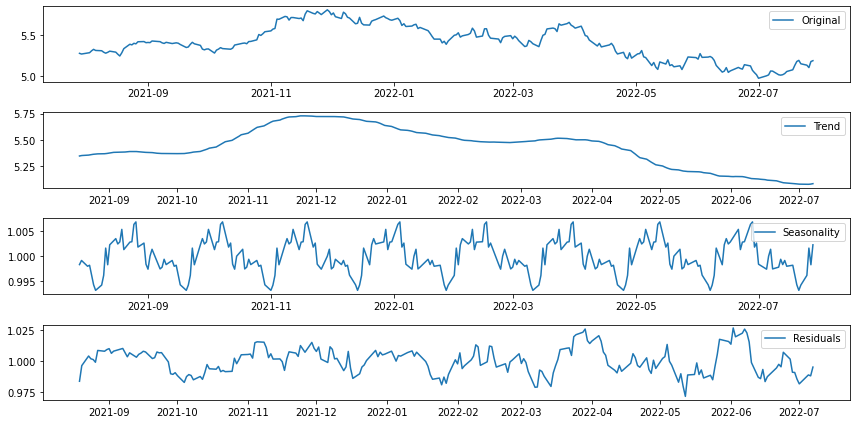

In [11]:
# 정성적 그래프 분석
plot_rolling_statistics(data4_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(data4_log)

#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(data4_log, model='multiplicative', period = 30) 

trend_data4_log = decomposition.trend
seasonal_data4_log = decomposition.seasonal
residual_data4_log = decomposition.resid

plt.rcParams["figure.figsize"] = (12,6)
plt.subplot(411)
plt.plot(data4_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_data4_log, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_data4_log,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_data4_log, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


* Residual 안정성 확인

In [12]:
residual_ts_log.dropna(inplace=True)
augmented_dickey_fuller_test(residual_ts_log)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


In [13]:
residual_data1_log.dropna(inplace=True)
augmented_dickey_fuller_test(residual_data1_log)

Results of Dickey-Fuller Test:
Test Statistic                  -5.363695
p-value                          0.000004
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


In [14]:
residual_data2_log.dropna(inplace=True)
augmented_dickey_fuller_test(residual_data2_log)

Results of Dickey-Fuller Test:
Test Statistic                  -5.280285
p-value                          0.000006
#Lags Used                       1.000000
Number of Observations Used    220.000000
Critical Value (1%)             -3.460428
Critical Value (5%)             -2.874769
Critical Value (10%)            -2.573821
dtype: float64


In [15]:
residual_data3_log.dropna(inplace=True)
augmented_dickey_fuller_test(residual_data3_log)

Results of Dickey-Fuller Test:
Test Statistic                -6.084038e+00
p-value                        1.075051e-07
#Lags Used                     9.000000e+00
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


In [16]:
residual_data4_log.dropna(inplace=True)
augmented_dickey_fuller_test(residual_data4_log)

Results of Dickey-Fuller Test:
Test Statistic                  -4.989979
p-value                          0.000023
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성

* 학습, 테스트 데이터셋 분리
* 9:1 분리

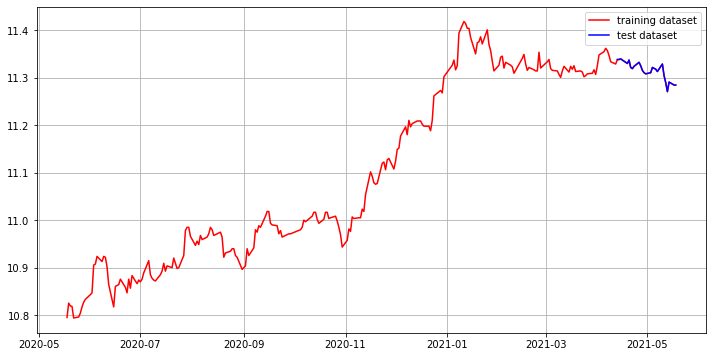

In [17]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

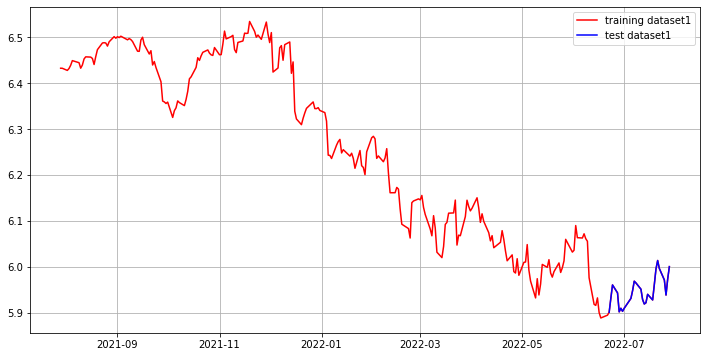

In [18]:
train_data1, test_data1 = data1_log[:int(len(data1_log)*0.9)], data1_log[int(len(data1_log)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(data1_log, c='r', label='training dataset1')
plt.plot(test_data1, c='b', label='test dataset1')
plt.legend()

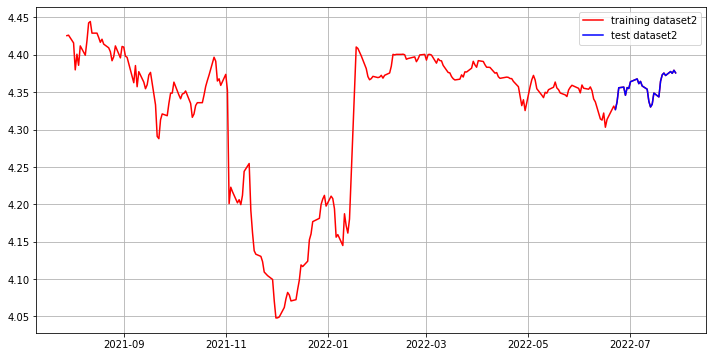

In [19]:
train_data2, test_data2 = data2_log[:int(len(data2_log)*0.9)], data2_log[int(len(data2_log)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(data2_log, c='r', label='training dataset2')
plt.plot(test_data2, c='b', label='test dataset2')
plt.legend()

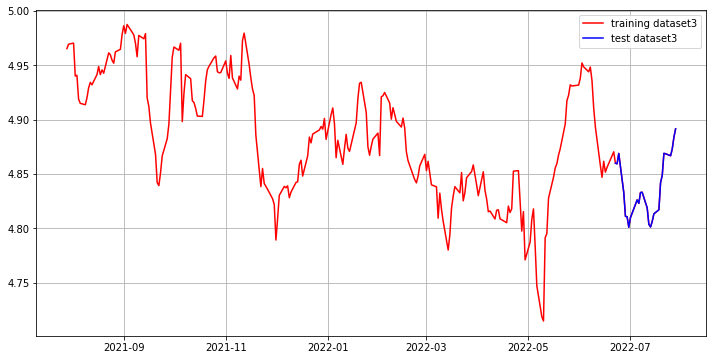

In [20]:
train_data3, test_data3 = data3_log[:int(len(data3_log)*0.9)], data3_log[int(len(data3_log)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(data3_log, c='r', label='training dataset3')
plt.plot(test_data3, c='b', label='test dataset3')
plt.legend()

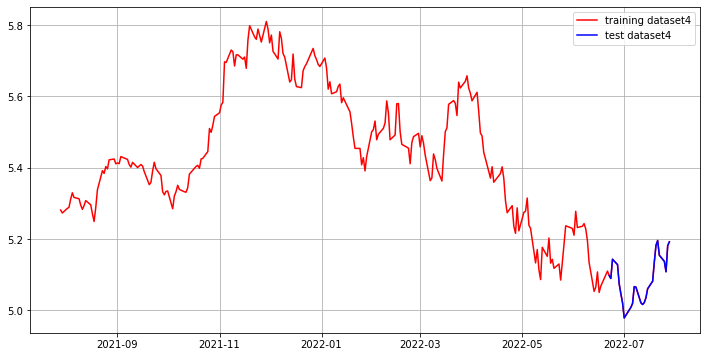

In [21]:
train_data4, test_data4 = data4_log[:int(len(data4_log)*0.9)], data4_log[int(len(data4_log)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(data4_log, c='r', label='training dataset4')
plt.plot(test_data4, c='b', label='test dataset4')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기

* ACF, PACF 그려보기 -> p,q 구하기

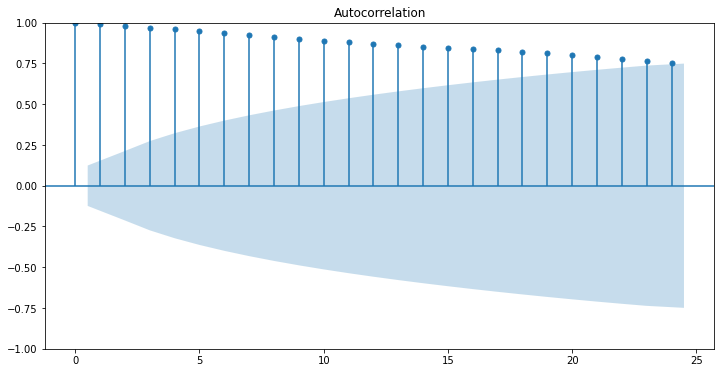

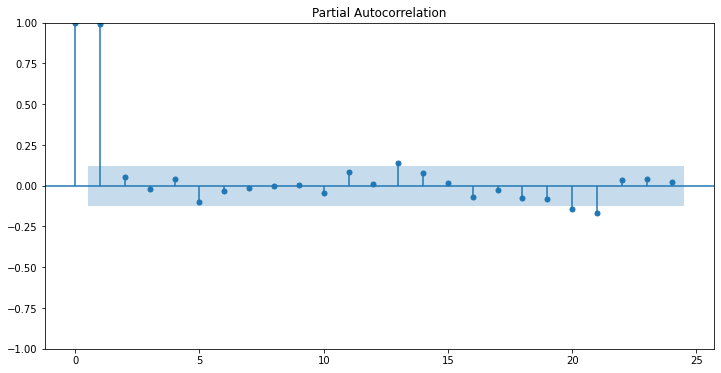

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기cc
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

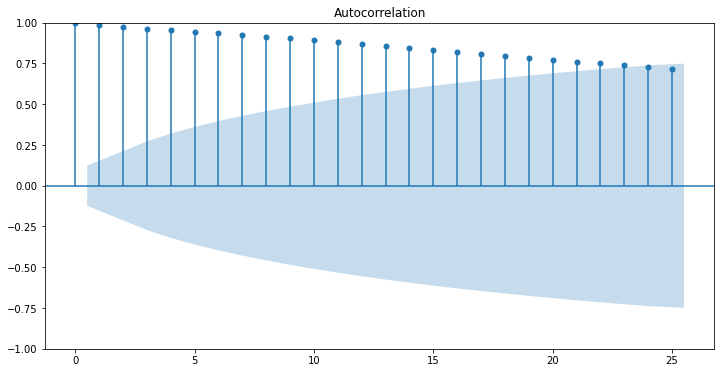

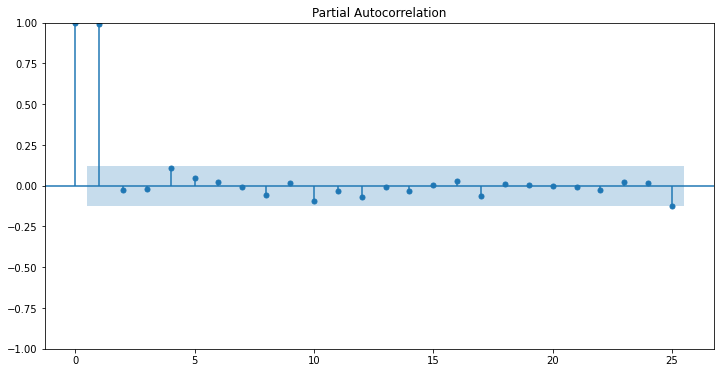

In [23]:
plot_acf(data1_log)   # ACF : Autocorrelation 그래프 그리기cc
plot_pacf(data1_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

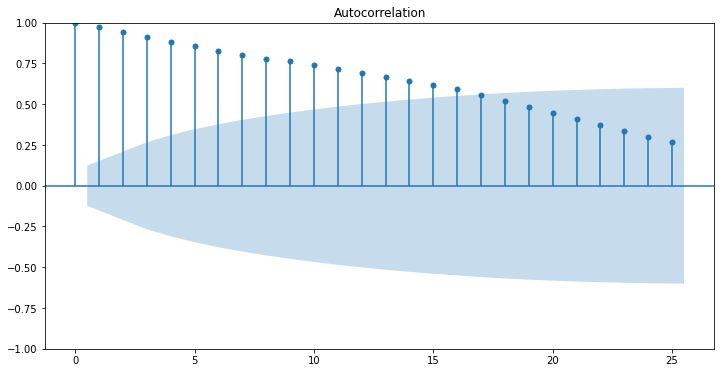

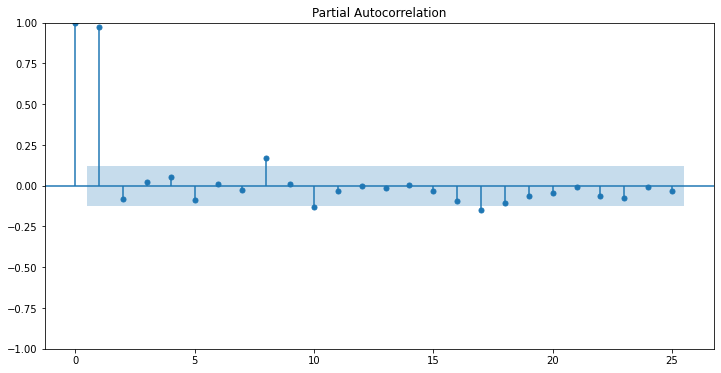

In [24]:
plot_acf(data2_log)   # ACF : Autocorrelation 그래프 그리기cc
plot_pacf(data2_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

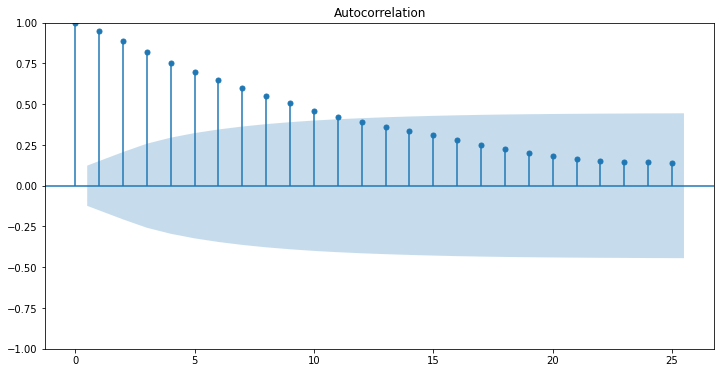

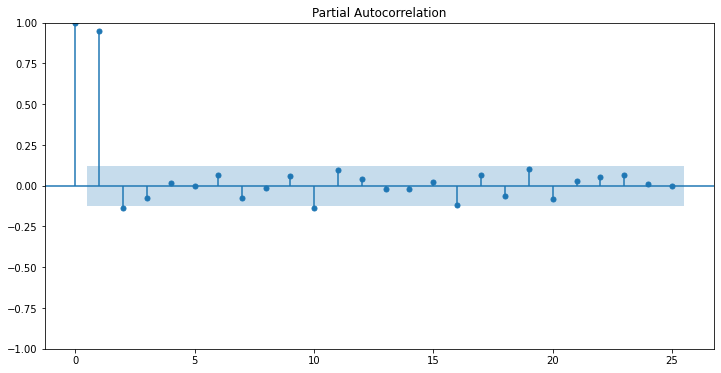

In [25]:
plot_acf(data3_log)   # ACF : Autocorrelation 그래프 그리기cc
plot_pacf(data3_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

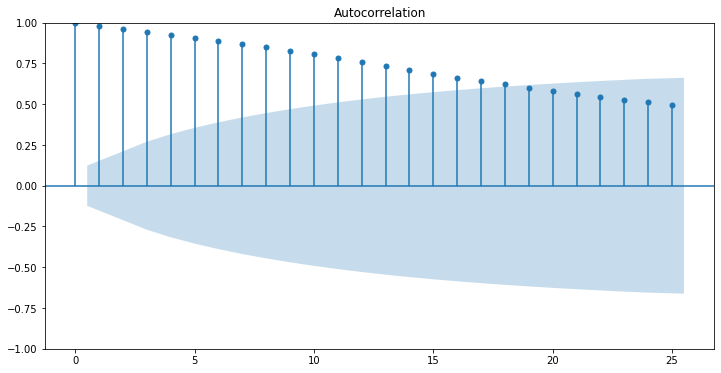

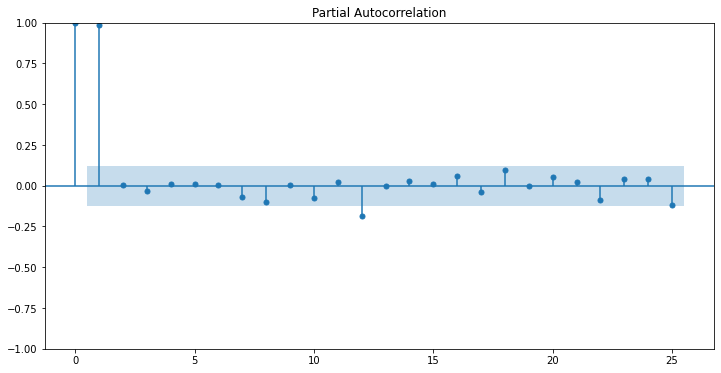

In [26]:
plot_acf(data4_log)   # ACF : Autocorrelation 그래프 그리기cc
plot_pacf(data4_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

그래프를 보면서 ACF와 PACF에서 신뢰구간으로 들어가는 위치의 값으로 p,q를 구합니다.
* ts_log : p = 24, q = 1
* data1_log : p = 23, q = 1
* data2_log : p = 17, q = 1
* data3_log : p = 11, q = 1
* data3_log : p = 18, q = 1

* 차분 안정성 확인 -> d 구하기

In [27]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [28]:
augmented_dickey_fuller_test(data1_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.883661
p-value                          0.793305
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [29]:
augmented_dickey_fuller_test(data2_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.916746
p-value                          0.324225
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [30]:
augmented_dickey_fuller_test(data3_log)

Results of Dickey-Fuller Test:
Test Statistic                  -3.022871
p-value                          0.032813
#Lags Used                       1.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [31]:
augmented_dickey_fuller_test(data4_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.291945
p-value                          0.632850
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


* ts_log : p-value가 높으므로 ts_log의 d는 1 이상입니다.
* data1_log : p-value가 높으므로 data1_log의 d는 1 이상입니다.
* data2_log : p-value가 높으므로 data2_log의 d는 1 이상입니다.
* data3_log : p-value도 작고, Critical Value (5%) data2_log의 d는 0입니다.
* data4_log : p-value가 높으므로 data2_log의 d는 1 이상입니다.

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


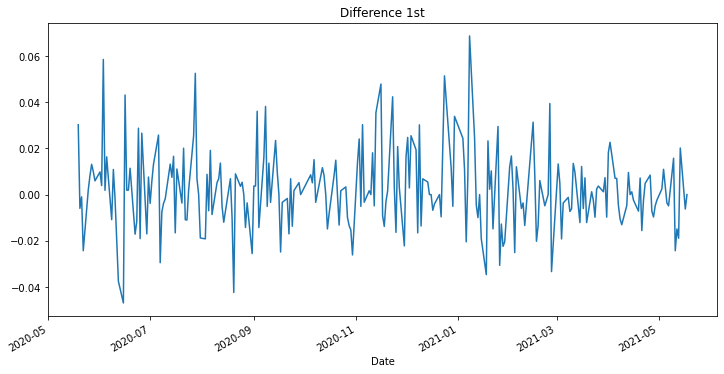

In [32]:
# 1차 차분
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(diff_1)
# # 2차 차분 구하기
# diff_2 = diff_1.diff(periods=1).iloc[1:]
# diff_2.plot(title='Difference 2nd')
# augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.608774e+01
p-value                        5.293910e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


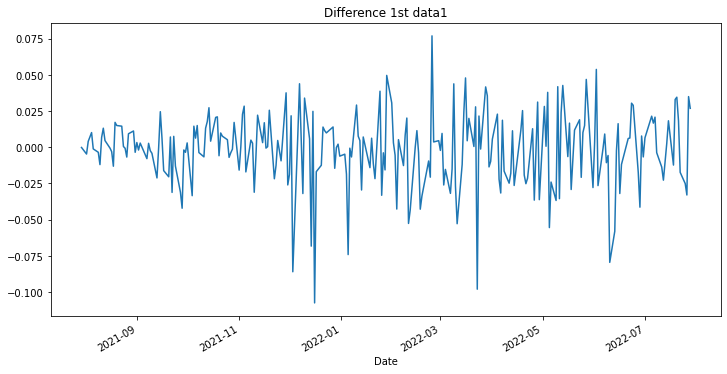

In [33]:
diff_data1 = data1_log.diff(periods=1).iloc[1:]
diff_data1.plot(title='Difference 1st data1')
augmented_dickey_fuller_test(diff_data1)

Results of Dickey-Fuller Test:
Test Statistic                -1.487379e+01
p-value                        1.648161e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


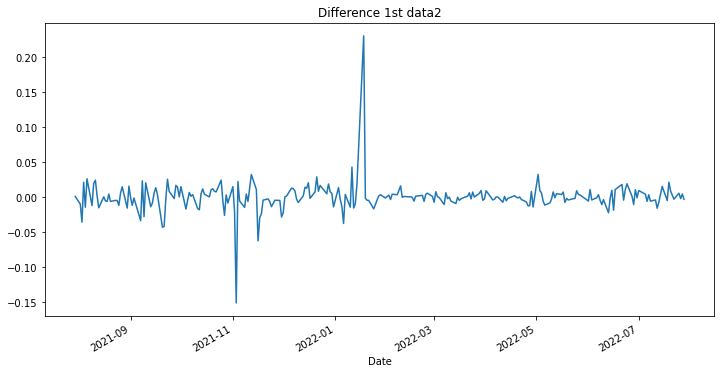

In [34]:
diff_data2 = data2_log.diff(periods=1).iloc[1:]
diff_data2.plot(title='Difference 1st data2')
augmented_dickey_fuller_test(diff_data2)

Results of Dickey-Fuller Test:
Test Statistic                -1.419504e+01
p-value                        1.828732e-26
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


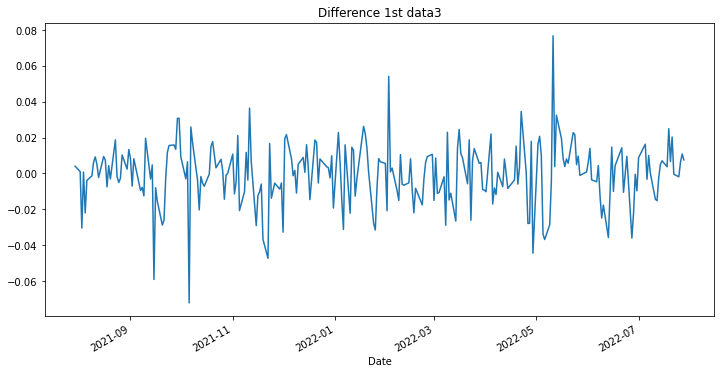

In [35]:
diff_data3 = data3_log.diff(periods=1).iloc[1:]
diff_data3.plot(title='Difference 1st data3')
augmented_dickey_fuller_test(diff_data3)

Results of Dickey-Fuller Test:
Test Statistic                -1.618540e+01
p-value                        4.224077e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


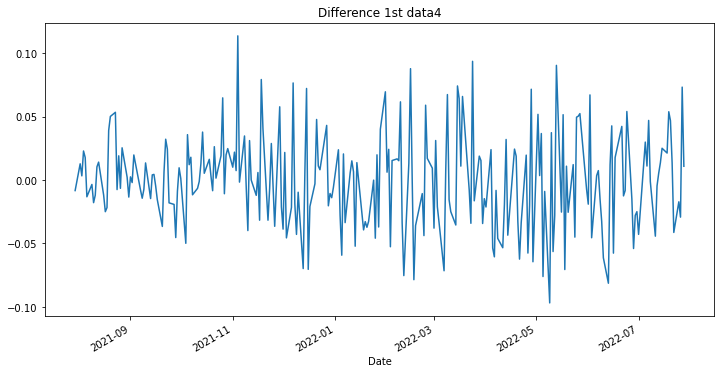

In [36]:
diff_data4 = data4_log.diff(periods=1).iloc[1:]
diff_data4.plot(title='Difference 1st data4')
augmented_dickey_fuller_test(diff_data4)

* ts_log : p-value도 작고 1%보다 작으므로 d = 1 입니다.
* data1_log : p-value도 작고 1%보다 작으므로 d = 1 입니다.
* data2_log : p-value도 작고 1%보다 작으므로 d = 1 입니다.
* data3_log : 차분전에 이미 구했습니다, d = 0 입니다.
* data4_log : p-value도 작고 1%보다 작으므로 d = 1 입니다.

최종 p,d,q 값
* ts_log : p = 24, d = 1, q = 1
* data1_log : p = 23, d = 1, q = 1
* data2_log : p = 17, d = 1, q = 1
* data3_log : p = 11, d = 0, q = 1
* data3_log : p = 18, d = 1, q = 1

### STEP 6 : ARIMA 모델 훈련과 테스트

* ARIMA 모델 빌드와 훈련

In [37]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(24, 1, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                ARIMA(24, 1, 1)   Log Likelihood                 591.690
Date:                Fri, 29 Jul 2022   AIC                          -1131.381
Time:                        23:48:41   BIC                          -1042.678
Sample:                             0   HQIC                         -1095.576
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0235      0.635      0.037      0.970      -1.221       1.268
ar.L2         -0.0149      0.086     -0.174      0.862      -0.183       0.153
ar.L3         -0.0508      0.084     -0.602      0.5

In [38]:
model_data1 = ARIMA(train_data1, order=(23, 1, 1))  
fitted_m_data1 = model_data1.fit() 

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
model_data2 = ARIMA(train_data2, order=(17, 1, 1))  
fitted_m_data2 = model_data2.fit() 

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
model_data3 = ARIMA(train_data3, order=(11, 0, 1))  
fitted_m_data3 = model_data3.fit() 

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

In [41]:
model_data4 = ARIMA(train_data4, order=(18, 1, 1))  
fitted_m_data4 = model_data4.fit() 

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

* 모델 테스트 및 플로팅

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


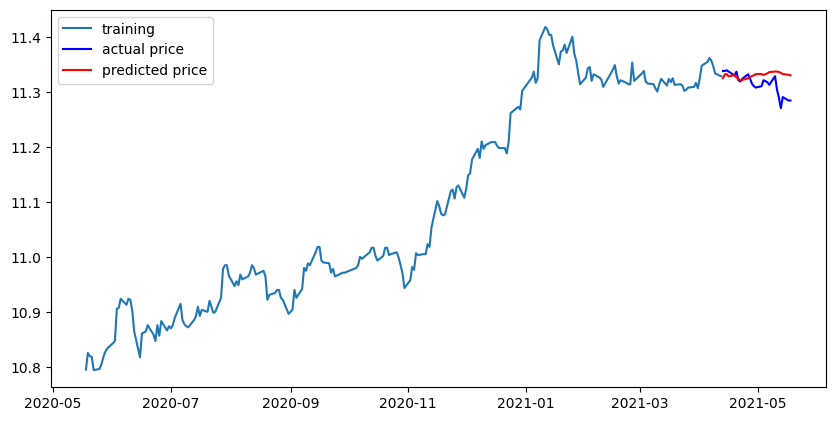

In [42]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


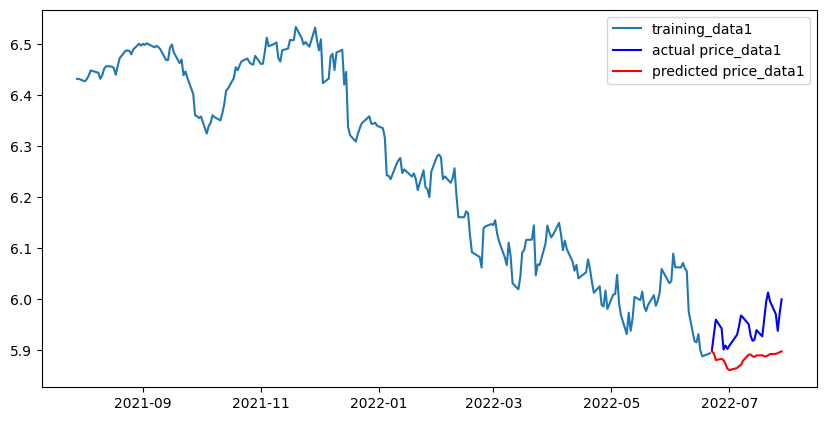

In [43]:
fc_data1 = fitted_m_data1.forecast(len(test_data1), alpha=0.05)  # 95% conf
fc_data1 = np.array(fc_data1)
fc_series_data1 = pd.Series(fc_data1, index=test_data1.index)   # 예측결과

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data1, label='training_data1')
plt.plot(test_data1, c='b', label='actual price_data1')
plt.plot(fc_series_data1, c='r',label='predicted price_data1')
plt.legend()
plt.show()

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


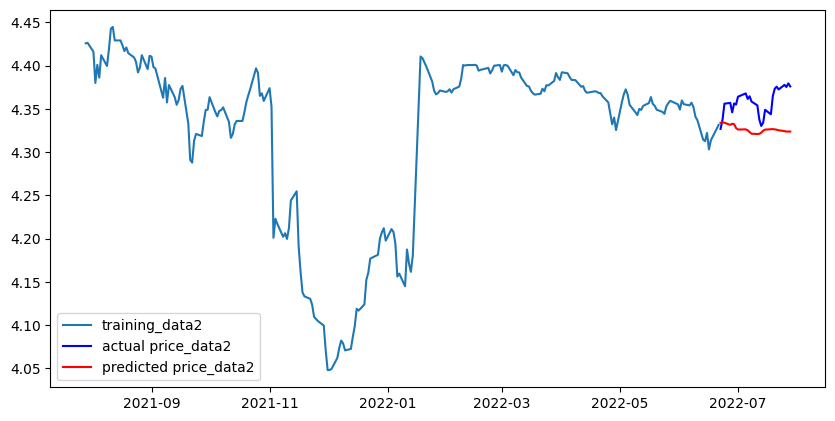

In [44]:
fc_data2 = fitted_m_data2.forecast(len(test_data2), alpha=0.05)  # 95% conf
fc_data2 = np.array(fc_data2)
fc_series_data2 = pd.Series(fc_data2, index=test_data2.index)   # 예측결과

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data2, label='training_data2')
plt.plot(test_data2, c='b', label='actual price_data2')
plt.plot(fc_series_data2, c='r',label='predicted price_data2')
plt.legend()
plt.show()

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


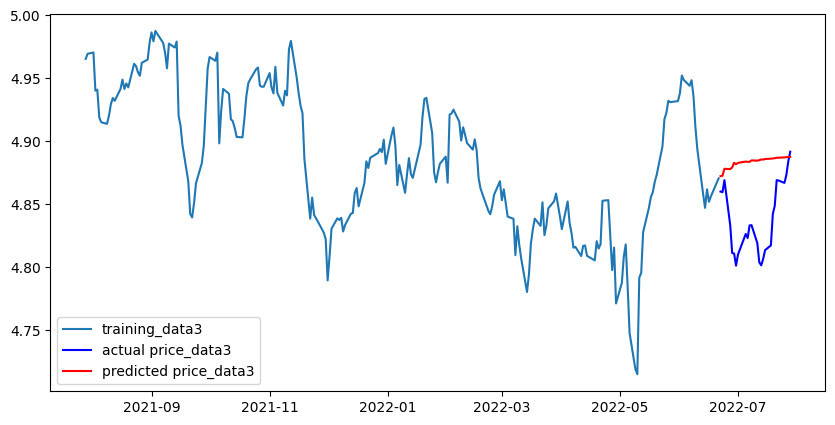

In [45]:
fc_data3 = fitted_m_data3.forecast(len(test_data3), alpha=0.05)  # 95% conf
fc_data3 = np.array(fc_data3)
fc_series_data3 = pd.Series(fc_data3, index=test_data3.index)   # 예측결과

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data3, label='training_data3')
plt.plot(test_data3, c='b', label='actual price_data3')
plt.plot(fc_series_data3, c='r',label='predicted price_data3')
plt.legend()
plt.show()

/home/aiffel/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


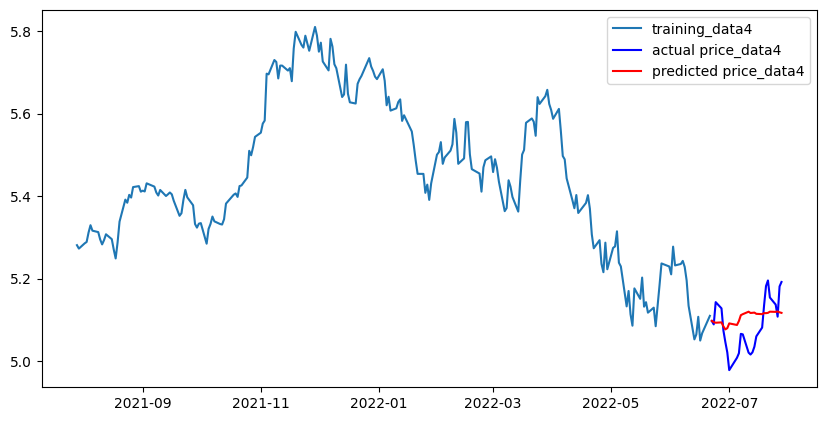

In [46]:
fc_data4 = fitted_m_data4.forecast(len(test_data4), alpha=0.05)  # 95% conf
fc_data4 = np.array(fc_data4)
fc_series_data4 = pd.Series(fc_data4, index=test_data4.index)   # 예측결과

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data4, label='training_data4')
plt.plot(test_data4, c='b', label='actual price_data4')
plt.plot(fc_series_data4, c='r',label='predicted price_data4')
plt.legend()
plt.show()

* 최종 예측 모델 정확도 측정(MAPE)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4436469.6771479435
MAE:  1570.5895639868284
RMSE:  2106.2928754444247
MAPE: 1.94%


In [48]:
mse_data1 = mean_squared_error(np.exp(test_data1), np.exp(fc_data1))
print('MSE_data1: ', mse_data1)
mae_data1 = mean_absolute_error(np.exp(test_data1), np.exp(fc_data1))
print('MAE_data1: ', mae_data1)
rmse_data1 = math.sqrt(mean_squared_error(np.exp(test_data1), np.exp(fc_data1)))
print('RMSE_data1: ', rmse_data1)
mape_data1 = np.mean(np.abs(np.exp(fc_data1) - np.exp(test_data1))/np.abs(np.exp(test_data1)))
print('MAPE_data1: {:.2f}%'.format(mape_data1*100))

MSE_data1:  660.0219555175524
MAE_data1:  23.015877043209464
RMSE_data1:  25.690892462457438
MAPE_data1: 5.93%


In [49]:
mse_data2 = mean_squared_error(np.exp(test_data2), np.exp(fc_data2))
print('MSE_data2: ', mse_data2)
mae_data2 = mean_absolute_error(np.exp(test_data2), np.exp(fc_data2))
print('MAE_data2: ', mae_data2)
rmse_data2 = math.sqrt(mean_squared_error(np.exp(test_data2), np.exp(fc_data2)))
print('RMSE_data2: ', rmse_data2)
mape_data2 = np.mean(np.abs(np.exp(fc_data2) - np.exp(test_data2))/np.abs(np.exp(test_data2)))
print('MAPE_data2: {:.2f}%'.format(mape_data2*100))

MSE_data2:  7.410187355035989
MAE_data2:  2.4253703712499686
RMSE_data2:  2.7221659308418342
MAPE_data2: 3.08%


In [50]:
mse_data3 = mean_squared_error(np.exp(test_data3), np.exp(fc_data3))
print('MSE_data3: ', mse_data3)
mae_data3 = mean_absolute_error(np.exp(test_data3), np.exp(fc_data3))
print('MAE_data3: ', mae_data3)
rmse_data3 = math.sqrt(mean_squared_error(np.exp(test_data3), np.exp(fc_data3)))
print('RMSE_data3: ', rmse_data3)
mape_data3 = np.mean(np.abs(np.exp(fc_data3) - np.exp(test_data3))/np.abs(np.exp(test_data3)))
print('MAPE_data3: {:.2f}%'.format(mape_data3*100))

MSE_data3:  47.11654608667833
MAE_data3:  5.930706005785682
RMSE_data3:  6.864149334526336
MAPE_data3: 4.78%


In [51]:
mse_data4 = mean_squared_error(np.exp(test_data4), np.exp(fc_data4))
print('MSE_data4: ', mse_data4)
mae_data4 = mean_absolute_error(np.exp(test_data4), np.exp(fc_data4))
print('MAE_data4: ', mae_data4)
rmse_data4 = math.sqrt(mean_squared_error(np.exp(test_data4), np.exp(fc_data4)))
print('RMSE_data4: ', rmse_data4)
mape_data4 = np.mean(np.abs(np.exp(fc_data4) - np.exp(test_data4))/np.abs(np.exp(test_data4)))
print('MAPE_data4: {:.2f}%'.format(mape_data4*100))

MSE_data4:  100.6214818673791
MAE_data4:  8.66766546580019
RMSE_data4:  10.031025962850416
MAPE_data4: 5.43%


MAPE
* 005930.KS : 1.94 %
* ADBE      : 5.93 %
* ATVI      : 3.08 %
* EA        : 4.78 %
* NVDA      : 5.43 %

### 회고

* 이번 프로젝트에서 어려웠던 점
    - 이론 이해하기(AIFFEL 귀무가설, 대립가설 페이지 수식).
* 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
  * 알게 된점
    - 주식끼리는 대체로 ACF, PACF 형태나 변화가 비슷하다.
    - d = 0인 data도 있을 수 있다.
  * 아직 모호한 점
    - 위쪽 어려웠던 점에서 나온 수식 부분은 좀 더 공부가 필요할 것 같습니다.
* 루브릭 평가를 맞추기 위해 시도한 점
    - 정확한 d 값을 위해 한번 더 계산해보았다.
    - 각각의 데이터에 대한 그래프 데이터표를 통해 쉽게 분석하였다.